<a href="https://colab.research.google.com/github/Rigboone-68/Data-Science-DEP/blob/main/Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload the Kaggle API key
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"qasimajlal","key":"4d46ec72b93a57cbf6963287e2090710"}'}

In [ ]:
# Create the .kaggle folder and move the kaggle.json file
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set the permissions


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Install the Kaggle library
!pip install kaggle

# Download the dataset from Kaggle
!kaggle datasets download -d shree1992/housedata

# Unzip the dataset
!unzip housedata.zip


Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 63.3MB/s]
Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


In [53]:
# Load necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


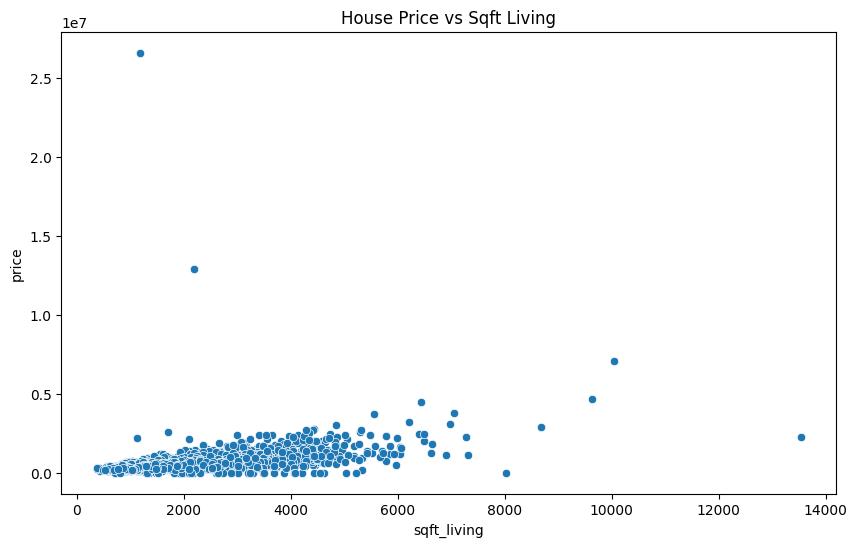

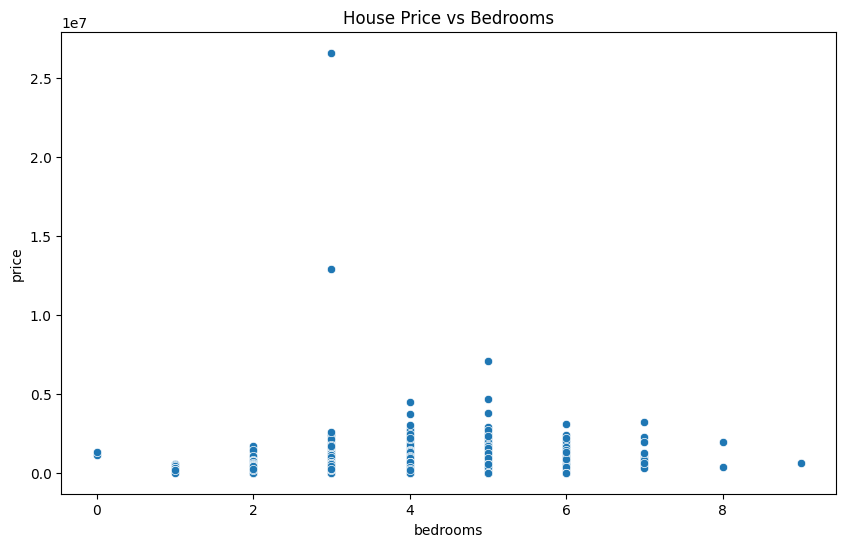

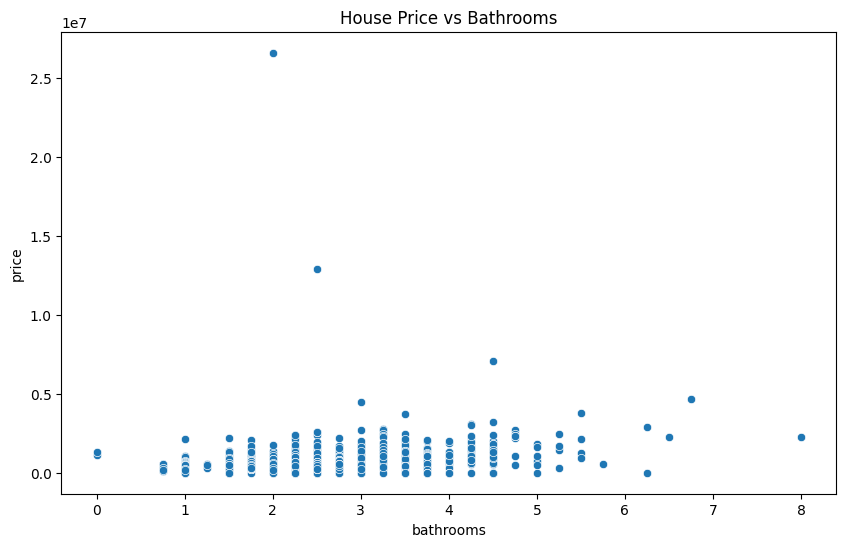

In [54]:
# Scatter plot for sqft_living vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('House Price vs Sqft Living')
plt.show()

# Scatter plot for bedrooms vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('House Price vs Bedrooms')
plt.show()

# Scatter plot for bathrooms vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bathrooms', y='price', data=df)
plt.title('House Price vs Bathrooms')
plt.show()


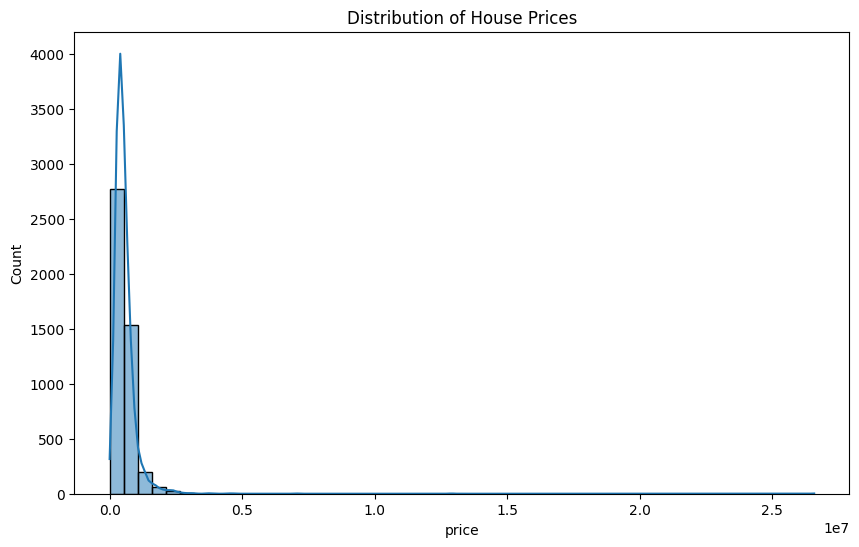

In [55]:
# Distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of House Prices')
plt.show()


In [56]:
# Check for missing values
print(df.isnull().sum())

# Get the data types of the columns
print(df.dtypes)

# Get basic statistical details about the numeric columns
df.describe()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [57]:
# Drop irrelevant columns
df = df.drop(['date'], axis=1)
df = df.drop(['street'], axis=1)
df = df.drop(['city'], axis=1)
df = df.drop(['statezip'], axis=1)
df = df.drop(['country'], axis=1)
df = df.drop(['yr_built'], axis=1)
df = df.drop(['yr_renovated'], axis=1)


# Check the data again
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800


In [64]:
# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns

# Print non-numeric columns
print(non_numeric_columns)

# Drop non-numeric columns if found
X = X.drop(non_numeric_columns, axis=1)

# Now X contains only numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Index(['street', 'city', 'statezip', 'country'], dtype='object')


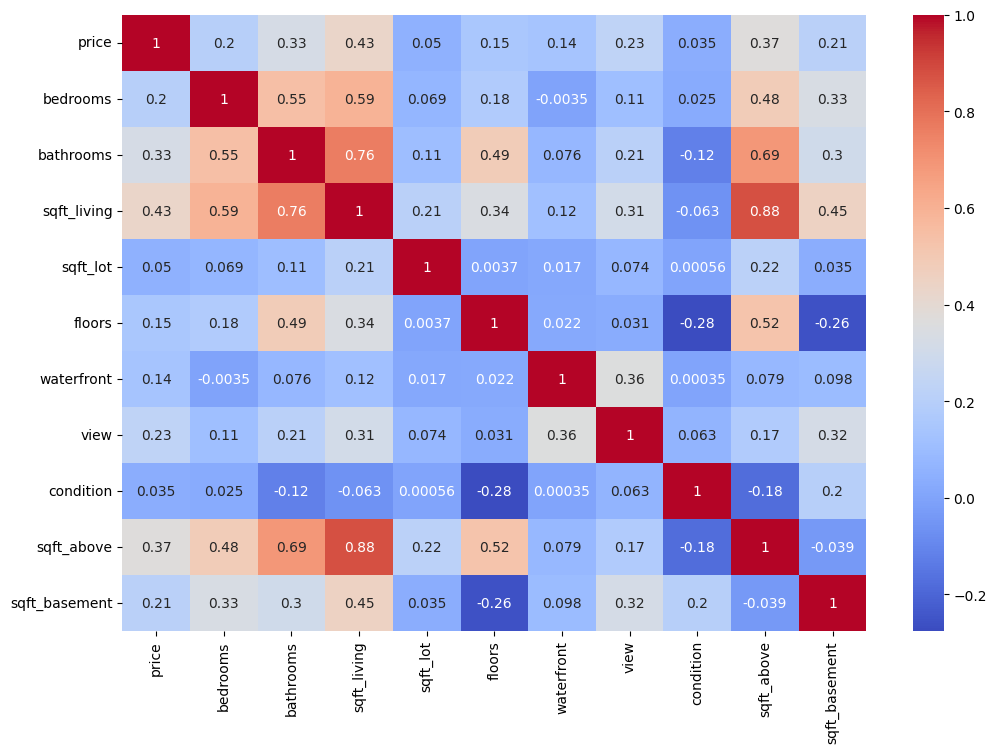

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


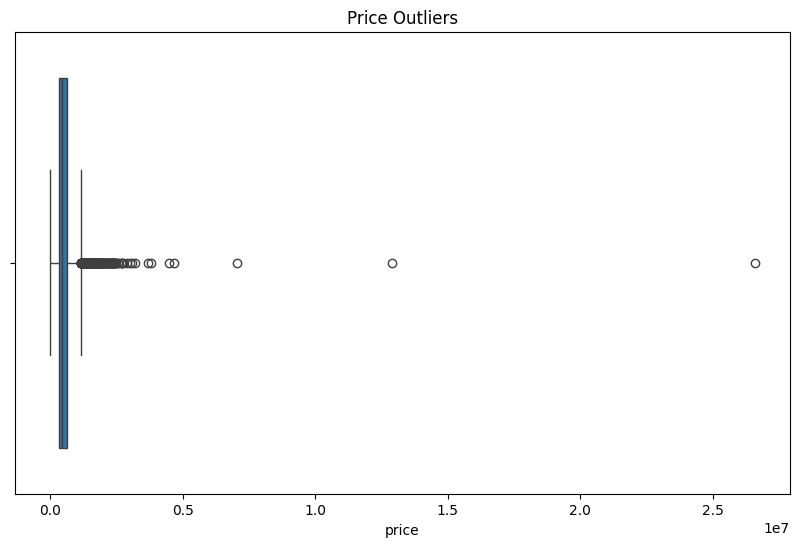

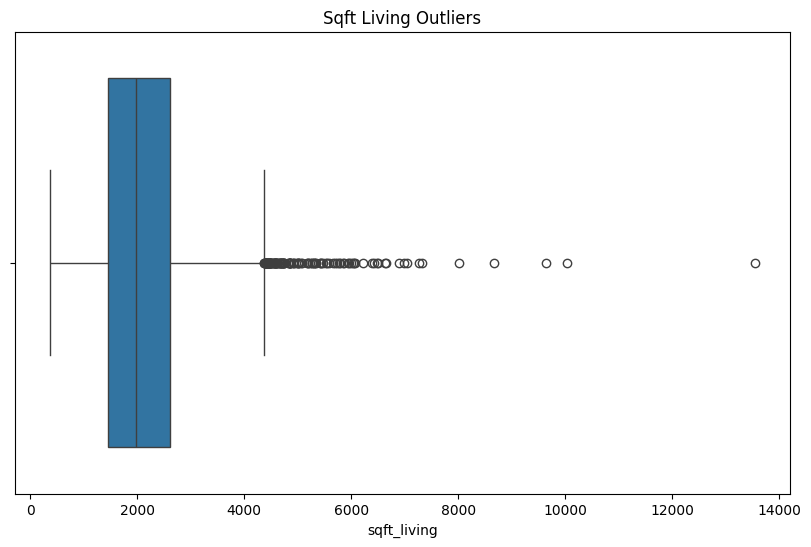

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('Price Outliers')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='sqft_living', data=df)
plt.title('Sqft Living Outliers')
plt.show()


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [72]:
import numpy as np

df['log_price'] = np.log(df['price'])


In [73]:
from sklearn.model_selection import cross_val_score

# Example: Cross-validate Random Forest
rf_model = RandomForestRegressor(random_state=42)
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='r2')

print(f"Cross-validated R² for Random Forest: {cv_scores.mean() * 100:.2f}%")


Cross-validated R² for Random Forest: 15.16%


In [74]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
import numpy as np

# Check for 0 or negative values in 'price' column
if (df['price'] <= 0).any():
  # Handle 0 or negative values (e.g., replace with a small positive value)
  df['price'] = np.where(df['price'] <= 0, 1e-6, df['price'])

df['log_price'] = np.log(df['price'])

# Check for infinite or very large values in 'log_price'
if np.isinf(df['log_price']).any() or np.isnan(df['log_price']).any():
  print("Warning: Infinite or NaN values found in 'log_price' after transformation.")
  # Handle these values appropriately (e.g., remove rows, impute values)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

print(f"Linear Regression R²: {r2_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")


Linear Regression R²: 0.05753242220380528
Linear Regression RMSE: 980393.8544615912


In [77]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)

print(f"Decision Tree R²: {r2_dt}")
print(f"Decision Tree RMSE: {rmse_dt}")


Decision Tree R²: 0.5572495773990559
Decision Tree RMSE: 671965.3250440236


In [78]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Random Forest R²: {r2_rf}")
print(f"Random Forest RMSE: {rmse_rf}")


Random Forest R²: 0.4112408413334401
Random Forest RMSE: 774883.1351621734


In [79]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters and model
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the tuned model
y_pred_rf_best = best_rf_model.predict(X_test)
r2_rf_best = r2_score(y_test, y_pred_rf_best)
rmse_rf_best = mean_squared_error(y_test, y_pred_rf_best, squared=False)

print(f"Tuned Random Forest R²: {r2_rf_best}")
print(f"Tuned Random Forest RMSE: {rmse_rf_best}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest R²: 0.3994544072072035
Tuned Random Forest RMSE: 782600.9358958608


In [80]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)

print(f"Gradient Boosting R²: {r2_gb}")
print(f"Gradient Boosting RMSE: {rmse_gb}")


Gradient Boosting R²: 0.4707203163149942
Gradient Boosting RMSE: 734699.903558268


In [81]:
# Evaluate the Linear Regression Model
r2_lr = r2_score(y_test, y_pred_lr) * 100  # Convert to percentage
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
print(f"Linear Regression: Accuracy = {r2_lr:.2f}%, RMSE = {rmse_lr:.2f}")

# Evaluate the Decision Tree Model
r2_dt = r2_score(y_test, y_pred_dt) * 100  # Convert to percentage
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
print(f"Decision Tree: Accuracy = {r2_dt:.2f}%, RMSE = {rmse_dt:.2f}")

# Evaluate the Random Forest Model
r2_rf = r2_score(y_test, y_pred_rf) * 100  # Convert to percentage
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest: Accuracy = {r2_rf:.2f}%, RMSE = {rmse_rf:.2f}")

# Evaluate the Tuned Random Forest Model
r2_rf_best = r2_score(y_test, y_pred_rf_best) * 100  # Convert to percentage
rmse_rf_best = mean_squared_error(y_test, y_pred_rf_best, squared=False)
print(f"Tuned Random Forest: Accuracy = {r2_rf_best:.2f}%, RMSE = {rmse_rf_best:.2f}")

# Evaluate the Gradient Boosting Model
r2_gb = r2_score(y_test, y_pred_gb) * 100  # Convert to percentage
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
print(f"Gradient Boosting: Accuracy = {r2_gb:.2f}%, RMSE = {rmse_gb:.2f}")


Linear Regression: Accuracy = 5.75%, RMSE = 980393.85
Decision Tree: Accuracy = 55.72%, RMSE = 671965.33
Random Forest: Accuracy = 41.12%, RMSE = 774883.14
Tuned Random Forest: Accuracy = 39.95%, RMSE = 782600.94
Gradient Boosting: Accuracy = 47.07%, RMSE = 734699.90


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='r2')

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best R² (Accuracy) for Random Forest: {grid_search_rf.best_score_ * 100:.2f}%")

# Predict using the best model
best_rf = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test_scaled)
r2_rf_best = r2_score(y_test, y_pred_rf_best) * 100
print(f"Test set R² (Accuracy) with the best Random Forest: {r2_rf_best:.2f}%")


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Best R² (Accuracy) for Random Forest: 50.24%
Test set R² (Accuracy) with the best Random Forest: 3.60%


In [83]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the model
xgb_model = xgb.XGBRegressor(random_state=42)

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

# Initialize RandomizedSearchCV
grid_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb,
                                     cv=5, n_iter=50, n_jobs=-1, random_state=42, scoring='r2')

# Fit the model
grid_search_xgb.fit(X_train_scaled, y_train)

# Best parameters and score for XGBoost
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best R² (Accuracy) for XGBoost: {grid_search_xgb.best_score_ * 100:.2f}%")

# Predict using the best model
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)
r2_xgb = r2_score(y_test, y_pred_xgb) * 100
print(f"Test set R² (Accuracy) with XGBoost: {r2_xgb:.2f}%")


Best parameters for XGBoost: {'subsample': 1, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best R² (Accuracy) for XGBoost: 50.81%
Test set R² (Accuracy) with XGBoost: 4.05%


In [84]:
from sklearn.ensemble import StackingRegressor

# Define base models
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', xgb.XGBRegressor(random_state=42))
]

# Define Stacking model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=RandomForestRegressor(random_state=42))

# Train the stacked model
stacked_model.fit(X_train_scaled, y_train)

# Predict using the stacked model
y_pred_stacked = stacked_model.predict(X_test_scaled)
r2_stacked = r2_score(y_test, y_pred_stacked) * 100
print(f"Test set R² (Accuracy) with Stacked Model: {r2_stacked:.2f}%")


Test set R² (Accuracy) with Stacked Model: 2.68%
